In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.8 MB/

In [2]:
import pycaret
pycaret.__version__

'3.3.0'

In [3]:
# загрузка сета
from pycaret.datasets import get_data
data = get_data('poker')

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0


In [4]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target = 'CLASS', session_id = 123)

,Description,Value
0,Session id,123
1,Target,CLASS
2,Target type,Multiclass
3,Original data shape,"(99998, 11)"
4,Transformed data shape,"(99998, 11)"
5,Transformed train set shape,"(69998, 11)"
6,Transformed test set shape,"(30000, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [ ]:
# init setup on exp
exp.setup(data, target = 'CLASS', session_id = 123)

,Description,Value
0,Session id,123
1,Target,CLASS
2,Target type,Multiclass
3,Original data shape,"(99998, 11)"
4,Transformed data shape,"(99998, 11)"
5,Transformed train set shape,"(69998, 11)"
6,Transformed test set shape,"(30000, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [5]:
# compare baseline models
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:44:00
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6454,0.7620,0.6454,0.6236,0.6128,0.3292,0.3379,9.9700
knn,K Neighbors Classifier,0.5649,0.6464,0.5649,0.5379,0.5419,0.1852,0.1881,2.6780
qda,Quadratic Discriminant Analysis,0.5439,0.6077,0.5439,0.4952,0.4942,0.1209,0.1360,0.1120
dt,Decision Tree Classifier,0.5301,0.5954,0.5301,0.5363,0.5331,0.1817,0.1817,0.4680
lr,Logistic Regression,0.5010,0.5022,0.5010,0.2510,0.3345,0.0000,0.0000,16.5230
nb,Naive Bayes,0.5010,0.5019,0.5010,0.2510,0.3345,0.0000,0.0000,0.0940
ridge,Ridge Classifier,0.5010,0.0000,0.5010,0.2510,0.3345,0.0000,0.0000,0.0780
svm,SVM - Linear Kernel,0.4722,0.0000,0.4722,0.3546,0.3406,-0.0011,-0.0021,2.9230
ada,Ada Boost Classifier,0.4569,0.5005,0.4569,0.4693,0.3477,0.0110,0.0214,2.1260


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.7787,0.8988,0.7787,0.7654,0.7533,0.5866,0.5943,5.1420
lightgbm,Light Gradient Boosting Machine,0.6787,0.7948,0.6787,0.6632,0.6525,0.4010,0.4109,14.2950
rf,Random Forest Classifier,0.6454,0.7620,0.6454,0.6236,0.6128,0.3292,0.3379,9.9700
et,Extra Trees Classifier,0.6125,0.7183,0.6125,0.5880,0.5804,0.2664,0.2745,10.6300
gbc,Gradient Boosting Classifier,0.6092,0.7232,0.6092,0.5766,0.5702,0.2545,0.2704,44.5480
knn,K Neighbors Classifier,0.5649,0.6464,0.5649,0.5379,0.5419,0.1852,0.1881,2.6780
qda,Quadratic Discriminant Analysis,0.5439,0.6077,0.5439,0.4952,0.4942,0.1209,0.1360,0.1120
dt,Decision Tree Classifier,0.5301,0.5954,0.5301,0.5363,0.5331,0.1817,0.1817,0.4680
lr,Logistic Regression,0.5010,0.5022,0.5010,0.2510,0.3345,0.0000,0.0000,16.5230
nb,Naive Bayes,0.5010,0.5019,0.5010,0.2510,0.3345,0.0000,0.0000,0.0940


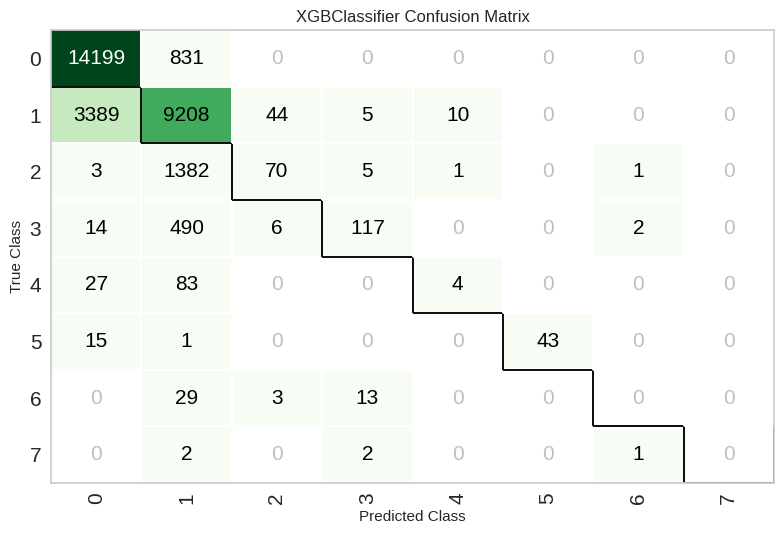

In [6]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

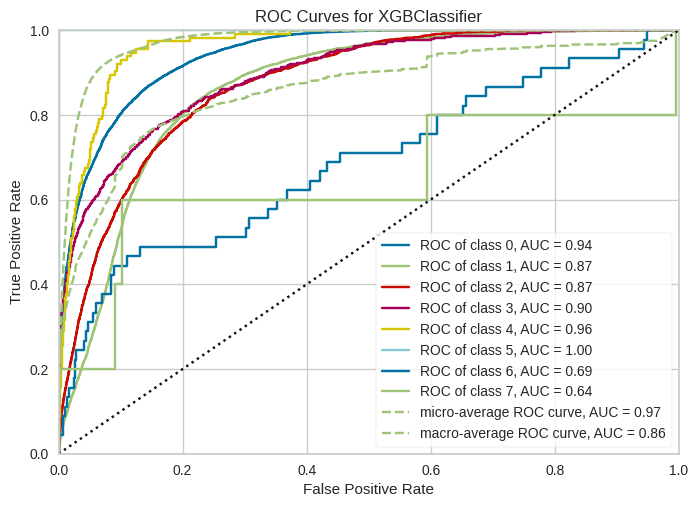

In [ ]:
# plot AUC
plot_model(best, plot = 'auc')

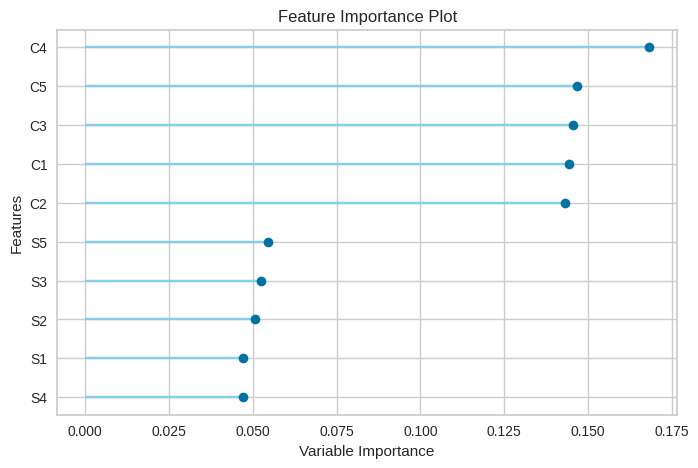

In [7]:

# plot feature importance
plot_model(best, plot = 'feature')

In [8]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.7880,0.9051,0.7880,0.7741,0.7627,0.6045,0.6119


Результаты совсем не впечатляющие.
Для улучшения применялись много способов. Основной был в создании функций, которые расчитывают значения "руки", но это сложно и не по DS

In [9]:
# copy data and drop Class variable
new_data = data.copy()
new_data.drop('CLASS', axis=1, inplace=True)
new_data.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
0,1,1,1,13,2,4,2,3,1,12
1,3,12,3,2,3,11,4,5,2,5
2,1,9,4,6,1,4,3,2,3,9
3,1,4,3,13,2,13,2,1,3,6
4,3,10,2,7,1,2,2,11,4,9


In [10]:
import numpy as np

In [11]:
def preprocess(df):
    suits = df[["S1", "S2", "S3", "S4", "S5"]]
    cards = df[["C1", "C2", "C3", "C4", "C5"]]

    # df["Diff_1"] = df["C5"] - df["C4"]
    # df["Diff_2"] = df["C4"] - df["C3"]
    # df["Diff_3"] = df["C3"] - df["C2"]
    # df["Diff_4"] = df["C2"] - df["C1"]
    # не повлияло на результат )))

    df["Unique_Suit"] = suits.apply(lambda x: len(np.unique(x)), axis=1)

    df["sum_S1"] = suits.apply(lambda x: sum(x == x[0]), axis=1)
    df["sum_C1"] = cards.apply(lambda x: sum(x == x[0]), axis=1)
    df["sum_S2"] = suits.apply(lambda x: sum(x == x[1]), axis=1)
    df["sum_C2"] = cards.apply(lambda x: sum(x == x[1]), axis=1)
    df["sum_S3"] = suits.apply(lambda x: sum(x == x[2]), axis=1)
    df["sum_C3"] = cards.apply(lambda x: sum(x == x[2]), axis=1)
    df["sum_S4"] = suits.apply(lambda x: sum(x == x[3]), axis=1)
    df["sum_C4"] = cards.apply(lambda x: sum(x == x[3]), axis=1)
    df["sum_S5"] = suits.apply(lambda x: sum(x == x[4]), axis=1)
    df["sum_C5"] = cards.apply(lambda x: sum(x == x[4]), axis=1)

    return df

Добавим несколько фич и ситуация поменялась

In [12]:
data_new = preprocess(data)

In [13]:
data_new.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,...,sum_S1,sum_C1,sum_S2,sum_C2,sum_S3,sum_C3,sum_S4,sum_C4,sum_S5,sum_C5
0,1,1,1,13,2,4,2,3,1,12,...,3,1,3,1,2,1,2,1,3,1
1,3,12,3,2,3,11,4,5,2,5,...,3,1,3,1,3,1,1,2,1,2
2,1,9,4,6,1,4,3,2,3,9,...,2,2,1,1,2,1,2,1,2,2
3,1,4,3,13,2,13,2,1,3,6,...,1,1,2,2,2,2,2,1,2,1
4,3,10,2,7,1,2,2,11,4,9,...,1,1,2,1,1,1,2,1,1,1


In [14]:
s = setup(data_new, target = 'CLASS', session_id = 123)

,Description,Value
0,Session id,123
1,Target,CLASS
2,Target type,Multiclass
3,Original data shape,"(99998, 22)"
4,Transformed data shape,"(99998, 22)"
5,Transformed train set shape,"(69998, 22)"
6,Transformed test set shape,"(30000, 22)"
7,Numeric features,21
8,Preprocess,True
9,Imputation type,simple


In [15]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9973,0.9999,0.9973,0.9972,0.9966,0.9953,0.9953,5.2110
gbc,Gradient Boosting Classifier,0.9963,0.9998,0.9963,0.9944,0.9945,0.9935,0.9935,61.5430
rf,Random Forest Classifier,0.9962,0.9995,0.9962,0.9924,0.9943,0.9933,0.9933,5.8410
et,Extra Trees Classifier,0.9962,0.9986,0.9962,0.9931,0.9944,0.9933,0.9933,5.1630
dt,Decision Tree Classifier,0.9956,0.9967,0.9956,0.9957,0.9957,0.9922,0.9922,0.2930
lr,Logistic Regression,0.9949,0.9973,0.9949,0.9907,0.9927,0.9911,0.9911,18.3070
nb,Naive Bayes,0.9786,0.9980,0.9786,0.9790,0.9772,0.9619,0.9623,0.2010
svm,SVM - Linear Kernel,0.9264,0.0000,0.9264,0.8699,0.8941,0.8639,0.8713,3.2270
ridge,Ridge Classifier,0.9229,0.0000,0.9229,0.8561,0.8871,0.8566,0.8648,0.1100
knn,K Neighbors Classifier,0.7149,0.8396,0.7149,0.7068,0.6919,0.4666,0.4779,5.0580


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

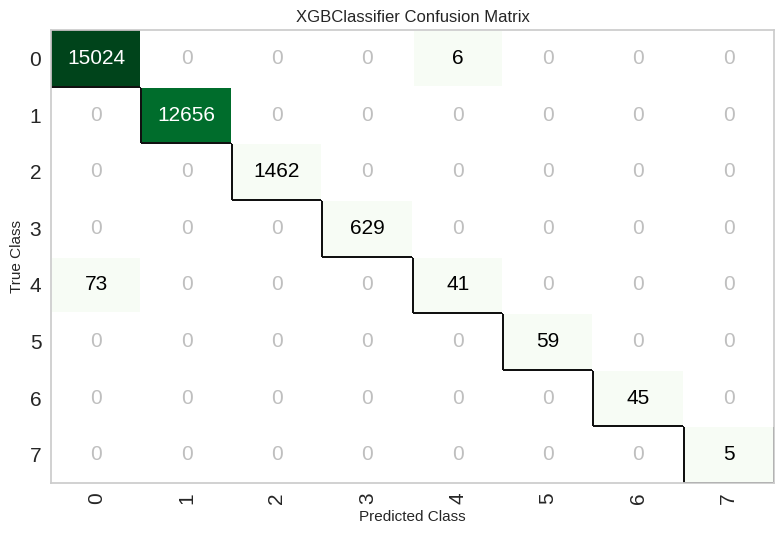

In [16]:
plot_model(best, plot = 'confusion_matrix')

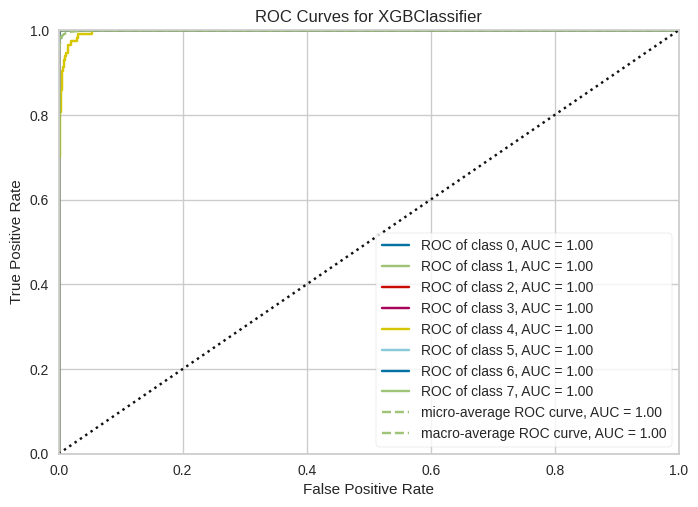

In [17]:
plot_model(best, plot = 'auc')

In [19]:
fine_method = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9974,1.0000,0.9974,0.9971,0.9968,0.9954,0.9954


Добавление нескольких фич расчитаных просто математическим путем раезко изменила метрики и модель показала очень хорошие результаты